In [15]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original


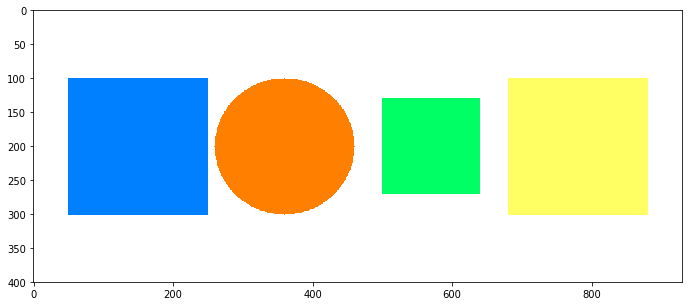

In [16]:
# Lets create our image
image_data = np.zeros((400,930,3), np.uint8) + 255

cv2.rectangle(image_data, (50,100), (250,300), (255,127,0), -1)
#cv2.rectangle(image_data, (260,100), (460,300), (0,127,255), -1)
cv2.circle(image_data, (360,200), 100, (0,127,255), -1)
cv2.rectangle(image_data, (500,130), (640,270), (100,255,0), -1)
cv2.rectangle(image_data, (680, 100), (880, 300), (100,255,255), -1)

cv2.imshow("Original", image_data)

In [17]:
# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image_data.shape[0], image_data.shape[1], 3))

In [18]:
# Create a copy of our original image
orginal_image = image_data.copy()

Showing Image: 1 - Canny Edges


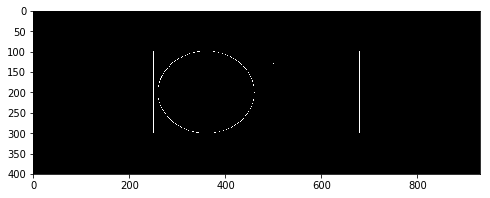

('Number of contours found = ', 4)
Showing Image: 2 - All Contours over blank image


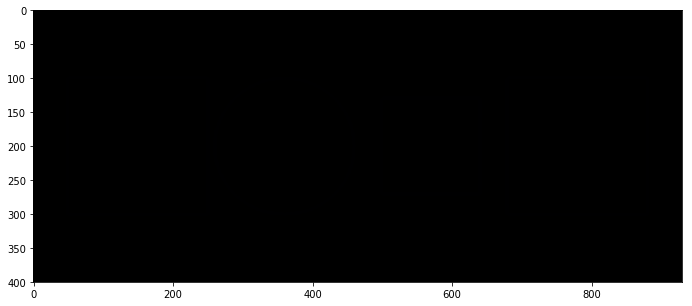

Showing Image: 3 - All Contours


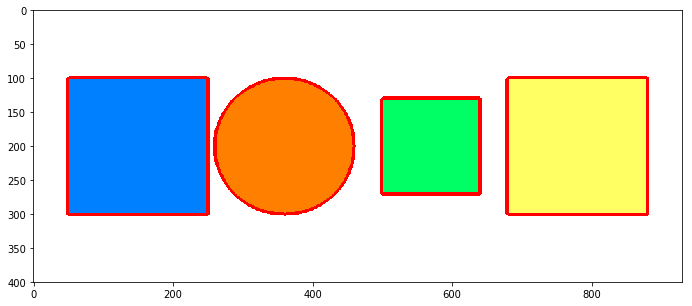

In [19]:
# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image_data.shape[0], image_data.shape[1], 3))

# Grayscale our image
gray = cv2.cvtColor(image_data,cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
cv2.imshow('1 - Canny Edges', edged, (8,3))

# Find contours and print how many were found
_, contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print ("Number of contours found = ", len(contours))

#Draw all contours
cv2.drawContours(blank_image, contours, -1, (0,0,255), 3)
cv2.imshow('2 - All Contours over blank image', blank_image)
#cv2.waitKey(0)

# Draw all contours over blank image
cv2.drawContours(image_data, contours, -1, (0,0,255), 3)
cv2.imshow('3 - All Contours', image_data)

## Sorting Contours by area

In [20]:
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [21]:
def get_centroid(contour):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return cX, cY

Contor Areas before sorting [19878.0, 31460.0, 40398.0, 40398.0]
Contor Areas after sorting [40398.0, 40398.0, 31460.0, 19878.0]
Showing Image: Contours by area


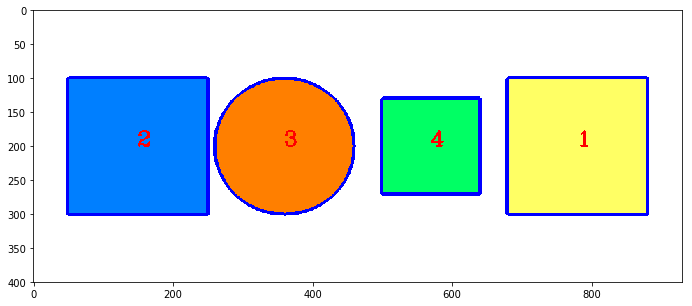

In [22]:
orginal_image = image_data.copy()

# Let's print the areas of the contours before sorting
print "Contor Areas before sorting", 
print get_contour_areas(contours)

# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print "Contor Areas after sorting", 
print get_contour_areas(sorted_contours)

# Iterate over our contours and draw one at a time
for i,c in enumerate(sorted_contours):
    cX, cY = get_centroid(c)
    cv2.putText(orginal_image, str(i+1), (cX,cY), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)

cv2.imshow('Contours by area', orginal_image)

In [23]:
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))

    
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
 
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

In [24]:
# Load our image
orginal_image = image_data.copy()

Showing Image: 4 - Contour Centers 


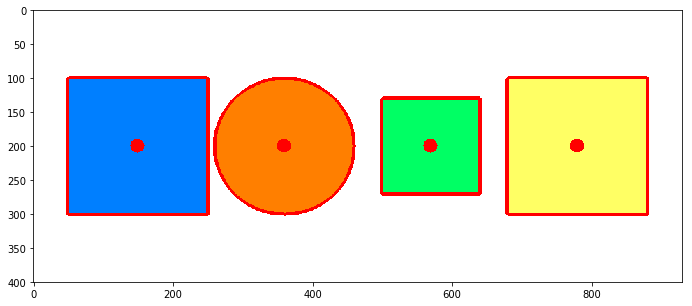

In [25]:
# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image_data, c)


cv2.imshow("4 - Contour Centers ", image_data)

Showing Image: 6 - Left to Right Contour


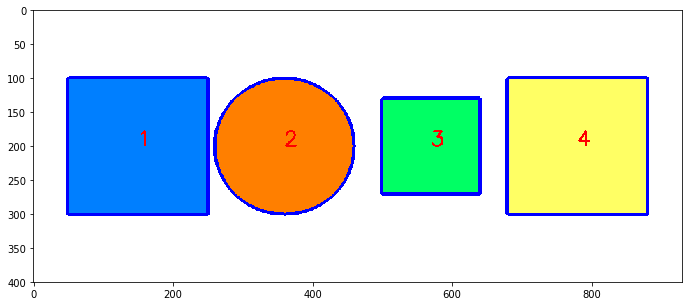

In [26]:
# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)


for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)  
    cx,cy = get_centroid(c)
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.imshow('6 - Left to Right Contour', orginal_image)